# Predictive Insights Project


## Question 1

1. Collaboration

A data scientist often needs to collaborate with cross-functional teams, including engineers, domain experts, and other stakeholders. The ability to effectively communicate findings, understand diverse perspectives, and integrate feedback is essential for developing practical solutions.

2. Curiosity

Curiosity drives data exploration beyond the obvious. When analysing data, we often have to seek out hidden patterns and ask insightful questions. Curiosity fuels the process of discovery, leading to more meaningful analyses and the development of solutions to complex problems.

3. Analytical Skills

Strong analytical skills are fundamental for interpreting data, applying statistical methods, and building models. They allow a data scientist to make sense of large and complex datasets, identify trends, and draw actionable conclusions.

## Question 2

1. R Studio

My favourite environment to work in is R Studio. I enjoy the user interface, and I love coding in R. The console, script editor, and plot pane make it so easy to develop and debug projects.

2. Tidyverse

Within the R universe, Tidyverse is the package I use the most. Actually, I use Tidyverse for every single data project I work on. The tidyverse simplifies complex data tasks and creates clean, readable code. Packages like Dplyr and ggplot2 within the Tidyverse make data manipulation and visualisation very easy.

## Question 3

The process I would follow to build a machine learning model for a cashier hiring system is the Cross-Industry Standard Process for Data Mining (CRISP-DM). CRISP-DM is an iterative process that consists of six main phases: business understanding, data understanding, data preparation, modelling, evaluation, and deployment. The clear structure of the framework helps in planning, executing, and communicating the project.

The initial business understanding phase focusses on understanding the project’s objectives and requirements from a business perspective. In this case, I would clarify the exact requirements of the AI hiring system. The data understanding phase is where the initial data collection and exploration are done. Understanding the available data, its structure, and its quality is a key step in identifying any issues or patterns that will impact the model and its performance. This step also helps explore any potential external data that could enrich the model. In data preparation, the relevant features are selected, cleaned, and transformed (if necessary). Depending on the state of the data, feature engineering might be required. Once the data is cleaned and prepared, I can select the appropriate model. The modelling stage requires choosing the right models, optimising their parameters, validating them, and finally deciding on the most accurate model for the data. Once the most accurate model has been chosen, it is important to evaluate whether the model’s performance meets the business objectives. In the final phase, the model is deployed into a production environment where it can make informed decisions about applicants.

The framework is flexible and iterative, allowing for adjustments and refinements at any phase in the process.

## Question 4

I employed a two-way ANOVA to test the effects of different teaching approaches on student outcomes. The experiment was designed using a complete block randomised design, which involves blocking students based on their subject-specific background knowledge and randomly assigning them within those blocks. I conducted the ANOVA to examine the effects of the teaching approach and the students' background subject knowledge on their outcomes and to understand if there is an interaction between those variables.

The results from the ANOVA show that the different teaching approaches have no significant effect on student outcomes. The results also show that there is no significant interaction between the teaching approaches and students' background subject knowledge, indicating that the effect of one factor does not depend on the level of the other. The only variable that has a significant effect on the students' outcomes is the sub-group variable that splits the students according to their background subject knowledge. It is important to note that Levene’s test indicates that our dataset does not have equal variances, meaning that there is an increased chance of incorrectly concluding that there is an effect when there isn't one in reality.

Upon further analysis of the sub_group variable, it is evident from the results of a t-test that the mean student outcome of students with no background in the subject is significantly lower than the mean of students with some background subject knowledge. But by measuring the size of the effect using Cohen's d, we can see that the difference between the two groups of students is small, even though it is statistically significant.

Below is the process I followed to explore, clean, and test the data:

In [1]:
# Loading the data and dependencies
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

df = pd.read_csv('test_data.csv')

## Exploratory Data Analysis

From the exploratory data analysis, we can see that the dataset contains three variables and an index. The variables are 'value' (representing the students' outcome), 'test' (representing the teaching approach), and'sub_group' (representing the groups the students are divided into based on their previous subject knowledge). There are no missing values in the entire dataset.

The dependent variable (value) is a continuous variable with a datatype of float64. The independent variables (test and sub_group) are categorical variables with the datatypes of int64.

In [2]:
# The exploratory data analysis
print(df.head(5))
print('Shape')
print(df.shape)
print('Value')
print(df['value'].describe())
print(df['test'].value_counts())
print(df['sub_group'].value_counts())

   Unnamed: 0     value test  sub_group
0           1  1.481962    A          1
1           2  1.201471    B          1
2           3 -0.832956    B          1
3           4  0.690690    A          1
4           5  0.266877    A          2
Shape
(10000, 4)
Value
count    10000.000000
mean         0.378955
std          1.207209
min         -4.862072
25%         -0.424023
50%          0.361637
75%          1.137128
max          5.596341
Name: value, dtype: float64
test
B    5071
A    4929
Name: count, dtype: int64
sub_group
1    5033
2    4967
Name: count, dtype: int64


## Assumptions Check

The ANOVA model makes four assumptions about the data.

1. The dependent variable follows a normal distribution.
2. The variance between the groups should be approximately equal.
3. The sample cases are independent of each other.
4. The treatment groups are randomised.

In the code below, I am ensuring that these assumptions are indeed satisfied by our data:

### 1. Normality of Dependent Variable

From the Histogram and Q-Q plot below we can see that the dependent variable does follow a normal distribution.

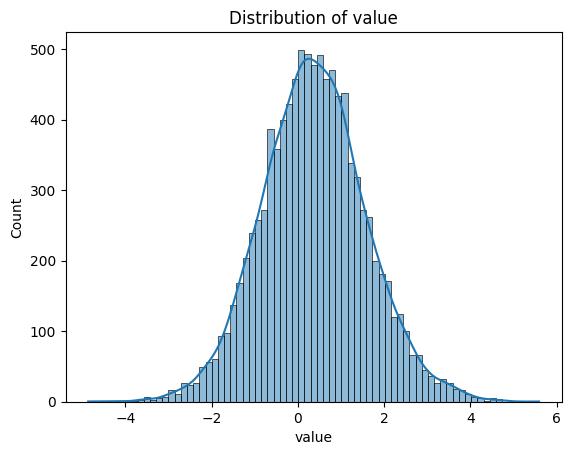

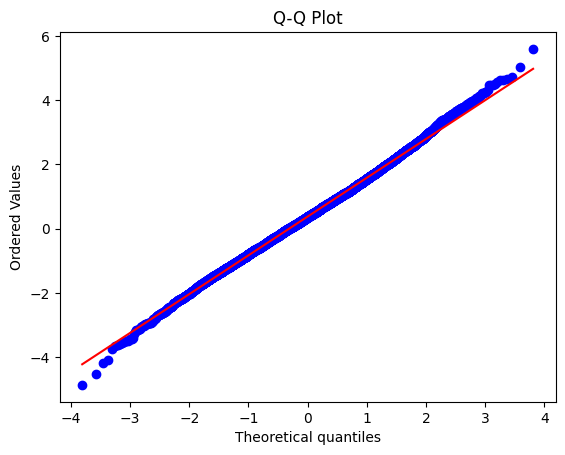

In [3]:
# Histogram
sns.histplot(df['value'], kde=True)
plt.title("Distribution of value")
plt.show()

# Q-Q plot
stats.probplot(df['value'], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

### 2. Homogeneity of Variances

The results from Levene’s test suggest that the assumption of homogeneity of variances has been violated by our dataset. In general, with violations of homogeneity, the study can carry on if the group sizes are equal. The bar graphs show that the groups are approximately equal. By violating the equal variances assumption, we increase the risk of witnessing an effect when, in reality, there is no effect.



In [4]:
# Testing Homogeneity of Variances

# Group by 'test' and 'sub_group', and get the values
grouped = df.groupby(['test', 'sub_group'])['value'].apply(list)

# Extract values for each group
groups = [group for group in grouped]

# Perform Levene's test
stat, p_value = levene(*groups)

# Print the result
print(f'Levene’s test statistic: {stat}')
print(f'Levene’s test p-value: {p_value}')


Levene’s test statistic: 188.35497664051053
Levene’s test p-value: 8.077634871369877e-119


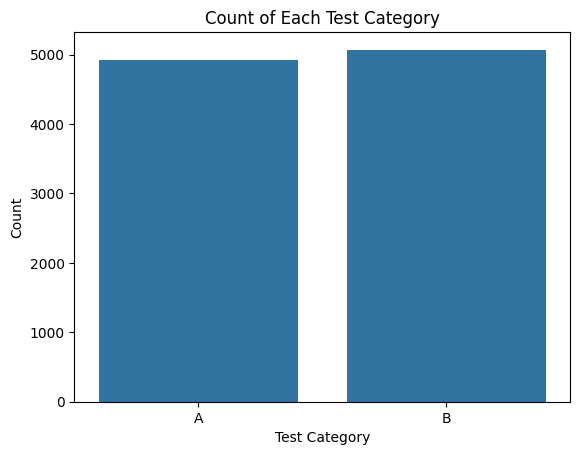

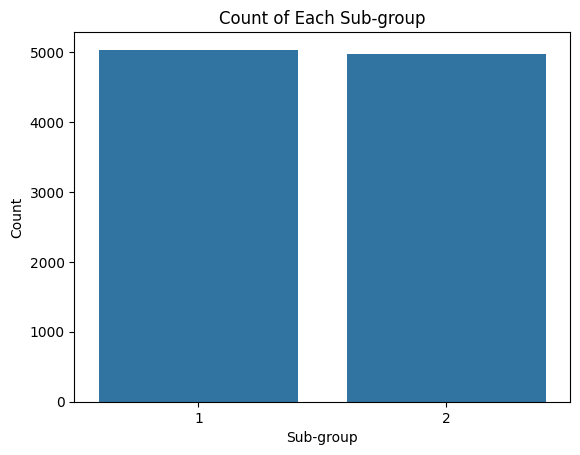

In [5]:
# Bar graph for the 'test' variable
sns.countplot(x='test', data=df)
plt.title('Count of Each Test Category')
plt.xlabel('Test Category')
plt.ylabel('Count')
plt.show()

# Bar graph for the 'sub_group' variable
sns.countplot(x='sub_group', data=df)
plt.title('Count of Each Sub-group')
plt.xlabel('Sub-group')
plt.ylabel('Count')
plt.show()

### 3. Independent Sample Cases

From the chi-square test we can see that our sample cases are independent.

In [6]:
# Create a contingency table
contingency_table = pd.crosstab(df['test'], df['sub_group'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")

# Interpretation
if p < 0.05:
    print("Variables are not independent (reject null hypothesis).")
else:
    print("Variables are independent (fail to reject null hypothesis).")

Chi-Square Value: 3.495408717899933
P-Value: 0.06153921588836362
Degrees of Freedom: 1
Variables are independent (fail to reject null hypothesis).


### 4. Randomisation of Treatment Groups

The experiment was designed as a complete block randomised design where we are blocking for students' background knowledge in the subject. In a complete block randomised design, treatment groups are indeed randomised within each block.

# Interpreting ANOVA Results

The results from the ANOVA show that:

* The test variable does not significantly influence the student outcome (p-value = 0.284).
* The sub_group variable has a significant effect on the student outcome (p-value < 0.001).
* The interaction between test and sub_group does not significantly influence the student outcome (p-value = 0.887).

The large sum of squares (14423.540) and the high degrees of freedom (9996) suggest that there is a lot of unexplained variability in the data.

In [8]:
# Cleaning data and performing ANOVA

# Changing variable data types
df['test'] = df['test'].astype(str)
df['sub_group'] = df['sub_group'].astype(str)

# Defining the model
model = ols('value ~ C(test) * C(sub_group)', data = df).fit()

# Performing the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                            sum_sq      df           F        PR(>F)
C(test)                   1.653319     1.0    1.145806  2.844547e-01
C(sub_group)            147.386938     1.0  102.144123  6.723923e-24
C(test):C(sub_group)      0.029055     1.0    0.020136  8.871613e-01
Residual              14423.539900  9996.0         NaN           NaN


## Investigating The Sub_Group Effect

From the analysis below we can see that the mean of sub_group 1 is lower than the mean of sub_group 2. The t-test shows that the difference between the two means is statistically significant. While Cohen's d suggests that while the difference between the means is statistically significant, it is not very large in practical terms.

In [34]:
# Group by 'sub_group' and calculate mean and standard deviation
group_stats = df.groupby('sub_group')['value'].agg(['mean', 'std'])
print(group_stats)


               mean       std
sub_group                    
1          0.258570  1.020855
2          0.500939  1.359706


In [37]:
# Split data based on 'sub_group'
group1 = df[df['sub_group'] == '1']['value']
group2 = df[df['sub_group'] == '2']['value']

# Perform t-test
t_stat, p_val = ttest_ind(group1, group2)
print(f'T-statistic: {t_stat}, P-value: {p_val}')

T-statistic: -10.088632824662046, P-value: 8.063283186297229e-24


In [38]:
# Calculate effect size (Cohen's d)
mean_diff = np.mean(group1) - np.mean(group2)
pooled_std = np.sqrt(((len(group1) - 1) * np.std(group1, ddof=1) ** 2 + (len(group2) - 1) * np.std(group2, ddof=1) ** 2) / (len(group1) + len(group2) - 2))
cohen_d = mean_diff / pooled_std
print(f'Cohen\'s d: {cohen_d}')

Cohen's d: -0.20177705124527645
